In [32]:
import import_ipynb
from DataProcessing import Data
from xgboost_impl import Xgboost
from catboost_impl import CatBoost
from catboost import CatBoostRegressor


import os
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

from sklearn.metrics import mean_absolute_error

import xgboost as xgb

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

In [33]:
train_a = pd.read_parquet('dataset/A/train_targets.parquet')
train_b = pd.read_parquet('dataset/B/train_targets.parquet')
train_c = pd.read_parquet('dataset/C/train_targets.parquet')

X_train_observed_a = pd.read_parquet('dataset/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('dataset/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('dataset/C/X_train_observed.parquet')

X_train_estimated_a = pd.read_parquet('dataset/A/X_train_estimated.parquet') 
X_train_estimated_b = pd.read_parquet('dataset/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('dataset/C/X_train_estimated.parquet')

X_test_estimated_a = pd.read_parquet('dataset/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('dataset/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('dataset/C/X_test_estimated.parquet')

In [34]:
data = Data(train_a, train_b, train_c, X_train_observed_a, X_train_observed_b, X_train_observed_c,
                      X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_test_estimated_a, 
                      X_test_estimated_b, X_test_estimated_c)

In [35]:
xg_model_a = xgb.XGBRegressor(
     device='cuda',
     learning_rate =0.05,
     n_estimators=1693,
     max_depth=16,
     min_child_weight=9,
     gamma=4.709926652039647,
     subsample=0.5746022561573897,
     colsample_bytree=0.925119931399705,
     seed=42,
     eval_metric= 'mae',
     booster='gbtree',
     reg_alpha=77.7952642777926,
     reg_lambda=102.6220459955603,
    )

xg_model_b = xgb.XGBRegressor(
     device='cuda',
     learning_rate =0.05,
     n_estimators=2880,
     max_depth=10,
     min_child_weight=2,
     gamma=6.9462927163070525,
     subsample=0.5425452253269976,
     colsample_bytree=0.8615770908405836,
     seed=42,
     eval_metric= 'mae',
     booster='gbtree',
     reg_alpha = 39.56391755892025,
     reg_lambda = 165.13746485969003,
    )


xg_model_c = xgb.XGBRegressor(
     device='cuda',
     learning_rate =0.05,
     n_estimators=2049,
     max_depth=11,
     min_child_weight=6,
     gamma=2.700424640722136,
     subsample=0.7625820679319437,
     colsample_bytree=0.6696305568496206,
     seed=42,
     eval_metric= 'mae',
     booster='gbtree',
     reg_alpha = 146.95411105137276,
     reg_lambda = 125.49465203052867,
    )

In [36]:
cb_model_a = CatBoostRegressor(iterations=661,
                       depth=10,
                       learning_rate=0.01838436853816393,
                       task_type="GPU",
                       devices='0:1',
                       eval_metric="MAE",
                       random_seed=42)
cb_model_b = CatBoostRegressor(iterations=524,
                       depth=10,
                       learning_rate=0.013526644801686614,
                       task_type="GPU",
                       devices='0:1',
                       eval_metric="MAE",
                       random_seed=42)
        
cb_model_c = CatBoostRegressor(iterations=128,
                       depth=10,
                       learning_rate=0.06913412566825089,
                       task_type="GPU",
                       devices='0:1',
                       eval_metric="MAE",
                       random_seed=42)

In [37]:
estimators_a = [
    ('xg', xg_model_a),
    ('cb', cb_model_a)
]

estimators_b = [
    ('xg', xg_model_b),
    ('cb', cb_model_b)
]

estimators_c = [
    ('xg', xg_model_c),
    ('cb', cb_model_c)
]

In [38]:
stacked_a = StackingRegressor(
     verbose=2,
     estimators=estimators_a,
)

stacked_b = StackingRegressor(
     verbose=2,
     estimators=estimators_b,
)

stacked_c = StackingRegressor(
     verbose=2,
     estimators=estimators_c,
)

In [41]:
stacked_a.fit(data.A.train_x, data.A.train_y).score(data.A.val_x, data.A.val_y)
stacked_b.fit(data.B.train_x, data.B.train_y).score(data.B.val_x, data.B.val_y)
stacked_c.fit(data.C.train_x, data.C.train_y).score(data.C.val_x, data.C.val_y)

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 848.0377497	total: 113ms	remaining: 1m 14s
1:	total: 226ms	remaining: 1m 14s
2:	total: 342ms	remaining: 1m 15s
3:	total: 454ms	remaining: 1m 14s
4:	total: 569ms	remaining: 1m 14s
5:	learn: 782.2259841	total: 683ms	remaining: 1m 14s
6:	total: 777ms	remaining: 1m 12s
7:	total: 887ms	remaining: 1m 12s
8:	total: 999ms	remaining: 1m 12s
9:	total: 1.11s	remaining: 1m 12s
10:	learn: 722.9455053	total: 1.22s	remaining: 1m 12s
11:	total: 1.33s	remaining: 1m 12s
12:	total: 1.45s	remaining: 1m 12s
13:	total: 1.56s	remaining: 1m 12s
14:	total: 1.67s	remaining: 1m 12s
15:	learn: 669.8841069	total: 1.79s	remaining: 1m 12s
16:	total: 1.9s	remaining: 1m 11s
17:	total: 2.01s	remaining: 1m 11s
18:	total: 2.12s	remaining: 1m 11s
19:	total: 2.23s	remaining: 1m 11s
20:	learn: 622.4039365	total: 2.35s	remaining: 1m 11s
21:	total: 2.46s	remaining: 1m 11s
22:	total: 2.58s	remaining: 1m 11s
23:	total: 2.69s	remaining: 1m 11s
24:	total: 2.8s	remaining: 1m 11s
25:	learn: 580.0596357	total: 2.94s	remain

217:	total: 25.4s	remaining: 51.7s
218:	total: 25.6s	remaining: 51.6s
219:	total: 25.7s	remaining: 51.4s
220:	learn: 197.8386090	total: 25.8s	remaining: 51.3s
221:	total: 25.9s	remaining: 51.2s
222:	total: 26s	remaining: 51.1s
223:	total: 26.2s	remaining: 51s
224:	total: 26.3s	remaining: 50.9s
225:	learn: 196.5123384	total: 26.4s	remaining: 50.8s
226:	total: 26.5s	remaining: 50.7s
227:	total: 26.6s	remaining: 50.6s
228:	total: 26.8s	remaining: 50.5s
229:	total: 26.9s	remaining: 50.4s
230:	learn: 195.1959092	total: 27s	remaining: 50.3s
231:	total: 27.1s	remaining: 50.1s
232:	total: 27.2s	remaining: 50s
233:	total: 27.4s	remaining: 49.9s
234:	total: 27.5s	remaining: 49.8s
235:	learn: 194.1490526	total: 27.6s	remaining: 49.7s
236:	total: 27.7s	remaining: 49.6s
237:	total: 27.9s	remaining: 49.5s
238:	total: 28s	remaining: 49.4s
239:	total: 28.1s	remaining: 49.3s
240:	learn: 193.2810848	total: 28.2s	remaining: 49.2s
241:	total: 28.3s	remaining: 49.1s
242:	total: 28.5s	remaining: 49s
243:	to

431:	total: 47.5s	remaining: 25.2s
432:	total: 47.6s	remaining: 25.1s
433:	total: 47.7s	remaining: 24.9s
434:	total: 47.7s	remaining: 24.8s
435:	learn: 177.4969705	total: 47.8s	remaining: 24.7s
436:	total: 47.8s	remaining: 24.5s
437:	total: 48s	remaining: 24.4s
438:	total: 48.1s	remaining: 24.3s
439:	total: 48.2s	remaining: 24.2s
440:	learn: 177.2670571	total: 48.2s	remaining: 24.1s
441:	total: 48.2s	remaining: 23.9s
442:	total: 48.3s	remaining: 23.7s
443:	total: 48.3s	remaining: 23.6s
444:	total: 48.3s	remaining: 23.4s
445:	learn: 177.2654230	total: 48.3s	remaining: 23.3s
446:	total: 48.4s	remaining: 23.1s
447:	total: 48.5s	remaining: 23s
448:	total: 48.5s	remaining: 22.9s
449:	total: 48.6s	remaining: 22.8s
450:	learn: 177.0995887	total: 48.6s	remaining: 22.6s
451:	total: 48.7s	remaining: 22.5s
452:	total: 48.7s	remaining: 22.4s
453:	total: 48.8s	remaining: 22.2s
454:	total: 48.8s	remaining: 22.1s
455:	learn: 176.8989424	total: 49s	remaining: 22s
456:	total: 49.1s	remaining: 21.9s
457

646:	total: 1m 6s	remaining: 1.43s
647:	total: 1m 6s	remaining: 1.33s
648:	total: 1m 6s	remaining: 1.23s
649:	total: 1m 6s	remaining: 1.13s
650:	learn: 168.2679568	total: 1m 6s	remaining: 1.02s
651:	total: 1m 6s	remaining: 922ms
652:	total: 1m 6s	remaining: 820ms
653:	total: 1m 6s	remaining: 717ms
654:	total: 1m 7s	remaining: 615ms
655:	learn: 167.8996952	total: 1m 7s	remaining: 513ms
656:	total: 1m 7s	remaining: 410ms
657:	total: 1m 7s	remaining: 307ms
658:	total: 1m 7s	remaining: 205ms
659:	total: 1m 7s	remaining: 102ms
660:	learn: 167.8119859	total: 1m 7s	remaining: 0us


Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 863.2147808	total: 134ms	remaining: 1m 28s
1:	total: 227ms	remaining: 1m 14s
2:	total: 319ms	remaining: 1m 10s
3:	total: 413ms	remaining: 1m 7s
4:	total: 502ms	remaining: 1m 5s
5:	learn: 795.8240073	total: 594ms	remaining: 1m 4s
6:	total: 673ms	remaining: 1m 2s
7:	total: 765ms	remaining: 1m 2s
8:	total: 859ms	remaining: 1m 2s
9:	total: 951ms	remaining: 1m 1s
10:	learn: 734.9495065	total: 1.06s	remaining: 1m 2s
11:	total: 1.16s	remaining: 1m 2s
12:	total: 1.25s	remaining: 1m 2s
13:	total: 1.34s	remaining: 1m 2s
14:	total: 1.44s	remaining: 1m 1s
15:	learn: 680.6790452	total: 1.53s	remaining: 1m 1s
16:	total: 1.62s	remaining: 1m 1s
17:	total: 1.72s	remaining: 1m 1s
18:	total: 1.82s	remaining: 1m 1s
19:	total: 1.93s	remaining: 1m 1s
20:	learn: 631.9154005	total: 2.03s	remaining: 1m 1s
21:	total: 2.12s	remaining: 1m 1s
22:	total: 2.21s	remaining: 1m 1s
23:	total: 2.31s	remaining: 1m 1s
24:	total: 2.4s	remaining: 1m 1s
25:	learn: 588.4229057	total: 2.5s	remaining: 1m
26:	total: 2.5

218:	total: 20.9s	remaining: 42.1s
219:	total: 21s	remaining: 42s
220:	learn: 196.5151021	total: 21.1s	remaining: 41.9s
221:	total: 21.2s	remaining: 41.9s
222:	total: 21.3s	remaining: 41.8s
223:	total: 21.4s	remaining: 41.7s
224:	total: 21.5s	remaining: 41.6s
225:	learn: 195.2529034	total: 21.6s	remaining: 41.5s
226:	total: 21.7s	remaining: 41.5s
227:	total: 21.8s	remaining: 41.4s
228:	total: 21.9s	remaining: 41.3s
229:	total: 22s	remaining: 41.2s
230:	learn: 193.8907046	total: 22.1s	remaining: 41.1s
231:	total: 22.2s	remaining: 41s
232:	total: 22.3s	remaining: 40.9s
233:	total: 22.4s	remaining: 40.8s
234:	total: 22.5s	remaining: 40.7s
235:	learn: 192.8027312	total: 22.6s	remaining: 40.7s
236:	total: 22.7s	remaining: 40.6s
237:	total: 22.8s	remaining: 40.5s
238:	total: 22.9s	remaining: 40.4s
239:	total: 23s	remaining: 40.3s
240:	learn: 191.7782304	total: 23.1s	remaining: 40.2s
241:	total: 23.2s	remaining: 40.1s
242:	total: 23.3s	remaining: 40s
243:	total: 23.4s	remaining: 39.9s
244:	to

434:	total: 40.1s	remaining: 20.8s
435:	learn: 176.0264517	total: 40.2s	remaining: 20.7s
436:	total: 40.3s	remaining: 20.6s
437:	total: 40.4s	remaining: 20.6s
438:	total: 40.5s	remaining: 20.5s
439:	total: 40.5s	remaining: 20.3s
440:	learn: 175.9497131	total: 40.5s	remaining: 20.2s
441:	total: 40.6s	remaining: 20.1s
442:	total: 40.7s	remaining: 20s
443:	total: 40.8s	remaining: 19.9s
444:	total: 40.9s	remaining: 19.8s
445:	learn: 175.6144939	total: 41s	remaining: 19.7s
446:	total: 41.1s	remaining: 19.7s
447:	total: 41.2s	remaining: 19.6s
448:	total: 41.2s	remaining: 19.5s
449:	total: 41.3s	remaining: 19.4s
450:	learn: 175.3570347	total: 41.5s	remaining: 19.3s
451:	total: 41.7s	remaining: 19.3s
452:	total: 41.8s	remaining: 19.2s
453:	total: 41.9s	remaining: 19.1s
454:	total: 42s	remaining: 19s
455:	learn: 175.0380422	total: 42s	remaining: 18.9s
456:	total: 42.1s	remaining: 18.8s
457:	total: 42.2s	remaining: 18.7s
458:	total: 42.3s	remaining: 18.6s
459:	total: 42.4s	remaining: 18.5s
460:	

649:	total: 59.7s	remaining: 1.01s
650:	learn: 165.6102823	total: 59.7s	remaining: 918ms
651:	total: 59.9s	remaining: 826ms
652:	total: 60s	remaining: 735ms
653:	total: 1m	remaining: 643ms
654:	total: 1m	remaining: 551ms
655:	learn: 165.2623824	total: 1m	remaining: 459ms
656:	total: 1m	remaining: 367ms
657:	total: 1m	remaining: 276ms
658:	total: 1m	remaining: 184ms
659:	total: 1m	remaining: 91.9ms
660:	learn: 164.8653661	total: 1m	remaining: 0us


Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 802.8601331	total: 105ms	remaining: 1m 9s
1:	total: 212ms	remaining: 1m 9s
2:	total: 337ms	remaining: 1m 13s
3:	total: 460ms	remaining: 1m 15s
4:	total: 562ms	remaining: 1m 13s
5:	learn: 740.5554280	total: 665ms	remaining: 1m 12s
6:	total: 758ms	remaining: 1m 10s
7:	total: 856ms	remaining: 1m 9s
8:	total: 952ms	remaining: 1m 8s
9:	total: 1.04s	remaining: 1m 8s
10:	learn: 684.2650907	total: 1.14s	remaining: 1m 7s
11:	total: 1.23s	remaining: 1m 6s
12:	total: 1.32s	remaining: 1m 6s
13:	total: 1.42s	remaining: 1m 5s
14:	total: 1.51s	remaining: 1m 5s
15:	learn: 633.7594216	total: 1.6s	remaining: 1m 4s
16:	total: 1.7s	remaining: 1m 4s
17:	total: 1.8s	remaining: 1m 4s
18:	total: 1.89s	remaining: 1m 3s
19:	total: 1.99s	remaining: 1m 3s
20:	learn: 588.6080790	total: 2.1s	remaining: 1m 3s
21:	total: 2.21s	remaining: 1m 4s
22:	total: 2.32s	remaining: 1m 4s
23:	total: 2.43s	remaining: 1m 4s
24:	total: 2.54s	remaining: 1m 4s
25:	learn: 548.4683498	total: 2.65s	remaining: 1m 4s
26:	total: 

216:	total: 21.9s	remaining: 44.8s
217:	total: 22s	remaining: 44.7s
218:	total: 22.1s	remaining: 44.6s
219:	total: 22.2s	remaining: 44.5s
220:	learn: 180.4890980	total: 22.3s	remaining: 44.3s
221:	total: 22.4s	remaining: 44.2s
222:	total: 22.5s	remaining: 44.1s
223:	total: 22.6s	remaining: 44s
224:	total: 22.6s	remaining: 43.9s
225:	learn: 179.3907161	total: 22.8s	remaining: 43.8s
226:	total: 22.9s	remaining: 43.7s
227:	total: 23s	remaining: 43.6s
228:	total: 23s	remaining: 43.5s
229:	total: 23.1s	remaining: 43.4s
230:	learn: 178.2790911	total: 23.2s	remaining: 43.3s
231:	total: 23.3s	remaining: 43.2s
232:	total: 23.5s	remaining: 43.1s
233:	total: 23.6s	remaining: 43s
234:	total: 23.7s	remaining: 42.9s
235:	learn: 177.0972688	total: 23.8s	remaining: 42.9s
236:	total: 23.9s	remaining: 42.8s
237:	total: 24s	remaining: 42.7s
238:	total: 24.1s	remaining: 42.6s
239:	total: 24.2s	remaining: 42.5s
240:	learn: 176.0498967	total: 24.3s	remaining: 42.4s
241:	total: 24.4s	remaining: 42.3s
242:	to

430:	learn: 161.5944113	total: 1m 8s	remaining: 37.1s
431:	total: 1m 8s	remaining: 36.7s
432:	total: 1m 8s	remaining: 36.5s
433:	total: 1m 8s	remaining: 36.3s
434:	total: 1m 8s	remaining: 36.2s
435:	learn: 161.2639660	total: 1m 9s	remaining: 36.1s
436:	total: 1m 9s	remaining: 36s
437:	total: 1m 9s	remaining: 35.8s
438:	total: 1m 9s	remaining: 35.6s
439:	total: 1m 9s	remaining: 35.3s
440:	learn: 161.0494377	total: 1m 9s	remaining: 35.1s
441:	total: 1m 9s	remaining: 35.1s
442:	total: 1m 9s	remaining: 34.8s
443:	total: 1m 10s	remaining: 34.6s
444:	total: 1m 10s	remaining: 34.4s
445:	learn: 160.9290567	total: 1m 10s	remaining: 34.2s
446:	total: 1m 10s	remaining: 34s
447:	total: 1m 10s	remaining: 33.8s
448:	total: 1m 10s	remaining: 33.6s
449:	total: 1m 10s	remaining: 33.4s
450:	learn: 160.7630939	total: 1m 10s	remaining: 33.2s
451:	total: 1m 10s	remaining: 33.1s
452:	total: 1m 10s	remaining: 32.9s
453:	total: 1m 10s	remaining: 32.7s
454:	total: 1m 10s	remaining: 32.5s
455:	learn: 160.643057

640:	learn: 155.9837044	total: 1m 26s	remaining: 2.72s
641:	total: 1m 26s	remaining: 2.58s
642:	total: 1m 26s	remaining: 2.44s
643:	total: 1m 26s	remaining: 2.3s
644:	total: 1m 26s	remaining: 2.17s
645:	learn: 155.9821781	total: 1m 26s	remaining: 2.03s
646:	total: 1m 26s	remaining: 1.89s
647:	total: 1m 26s	remaining: 1.75s
648:	total: 1m 26s	remaining: 1.62s
649:	total: 1m 27s	remaining: 1.5s
650:	learn: 155.7882603	total: 1m 27s	remaining: 1.36s
651:	total: 1m 27s	remaining: 1.22s
652:	total: 1m 27s	remaining: 1.08s
653:	total: 1m 27s	remaining: 948ms
654:	total: 1m 28s	remaining: 813ms
655:	learn: 155.7540624	total: 1m 28s	remaining: 676ms
656:	total: 1m 28s	remaining: 540ms
657:	total: 1m 28s	remaining: 405ms
658:	total: 1m 28s	remaining: 271ms
659:	total: 1m 28s	remaining: 135ms
660:	learn: 155.6064150	total: 1m 28s	remaining: 0us


Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 929.9629120	total: 159ms	remaining: 1m 44s
1:	total: 257ms	remaining: 1m 24s
2:	total: 352ms	remaining: 1m 17s
3:	total: 452ms	remaining: 1m 14s
4:	total: 559ms	remaining: 1m 13s
5:	learn: 857.9938493	total: 648ms	remaining: 1m 10s
6:	total: 732ms	remaining: 1m 8s
7:	total: 1.01s	remaining: 1m 22s
8:	total: 1.26s	remaining: 1m 31s
9:	total: 1.37s	remaining: 1m 28s
10:	learn: 793.1460571	total: 1.46s	remaining: 1m 26s
11:	total: 1.6s	remaining: 1m 26s
12:	total: 1.7s	remaining: 1m 24s
13:	total: 1.8s	remaining: 1m 23s
14:	total: 1.91s	remaining: 1m 22s
15:	learn: 735.1907647	total: 2s	remaining: 1m 20s
16:	total: 2.1s	remaining: 1m 19s
17:	total: 2.19s	remaining: 1m 18s
18:	total: 2.29s	remaining: 1m 17s
19:	total: 2.38s	remaining: 1m 16s
20:	learn: 683.0145506	total: 2.48s	remaining: 1m 15s
21:	total: 2.59s	remaining: 1m 15s
22:	total: 2.68s	remaining: 1m 14s
23:	total: 2.78s	remaining: 1m 13s
24:	total: 2.87s	remaining: 1m 12s
25:	learn: 636.5094097	total: 2.96s	remaining: 1

217:	total: 25.5s	remaining: 51.9s
218:	total: 25.6s	remaining: 51.7s
219:	total: 25.7s	remaining: 51.6s
220:	learn: 215.2867897	total: 26s	remaining: 51.7s
221:	total: 26.1s	remaining: 51.5s
222:	total: 26.2s	remaining: 51.4s
223:	total: 26.3s	remaining: 51.3s
224:	total: 26.4s	remaining: 51.2s
225:	learn: 213.8618379	total: 26.7s	remaining: 51.4s
226:	total: 26.8s	remaining: 51.3s
227:	total: 26.9s	remaining: 51.1s
228:	total: 27s	remaining: 51s
229:	total: 27.1s	remaining: 50.8s
230:	learn: 212.4944919	total: 27.2s	remaining: 50.6s
231:	total: 27.3s	remaining: 50.5s
232:	total: 27.4s	remaining: 50.4s
233:	total: 27.6s	remaining: 50.4s
234:	total: 27.7s	remaining: 50.2s
235:	learn: 211.4609382	total: 27.8s	remaining: 50.1s
236:	total: 28s	remaining: 50.1s
237:	total: 28.1s	remaining: 50s
238:	total: 28.2s	remaining: 49.9s
239:	total: 28.4s	remaining: 49.7s
240:	learn: 210.2218168	total: 28.5s	remaining: 49.6s
241:	total: 28.6s	remaining: 49.5s
242:	total: 28.7s	remaining: 49.3s
243:	

431:	total: 48.1s	remaining: 25.5s
432:	total: 48.2s	remaining: 25.4s
433:	total: 48.2s	remaining: 25.2s
434:	total: 48.2s	remaining: 25s
435:	learn: 192.6128707	total: 48.2s	remaining: 24.9s
436:	total: 48.2s	remaining: 24.7s
437:	total: 48.3s	remaining: 24.6s
438:	total: 48.3s	remaining: 24.4s
439:	total: 48.3s	remaining: 24.3s
440:	learn: 192.6089691	total: 48.3s	remaining: 24.1s
441:	total: 48.4s	remaining: 24s
442:	total: 48.6s	remaining: 23.9s
443:	total: 48.7s	remaining: 23.8s
444:	total: 48.7s	remaining: 23.6s
445:	learn: 192.3325874	total: 48.8s	remaining: 23.5s
446:	total: 48.9s	remaining: 23.4s
447:	total: 49s	remaining: 23.3s
448:	total: 49s	remaining: 23.1s
449:	total: 49.1s	remaining: 23s
450:	learn: 192.1783829	total: 49.1s	remaining: 22.9s
451:	total: 49.1s	remaining: 22.7s
452:	total: 49.1s	remaining: 22.6s
453:	total: 49.2s	remaining: 22.4s
454:	total: 49.2s	remaining: 22.3s
455:	learn: 192.0484256	total: 49.3s	remaining: 22.2s
456:	total: 49.4s	remaining: 22s
457:	to

645:	learn: 182.7330740	total: 1m 13s	remaining: 1.71s
646:	total: 1m 13s	remaining: 1.59s
647:	total: 1m 13s	remaining: 1.48s
648:	total: 1m 13s	remaining: 1.36s
649:	total: 1m 13s	remaining: 1.25s
650:	learn: 182.6329868	total: 1m 13s	remaining: 1.14s
651:	total: 1m 14s	remaining: 1.02s
652:	total: 1m 14s	remaining: 908ms
653:	total: 1m 14s	remaining: 794ms
654:	total: 1m 14s	remaining: 681ms
655:	learn: 182.3412857	total: 1m 14s	remaining: 567ms
656:	total: 1m 14s	remaining: 454ms
657:	total: 1m 14s	remaining: 340ms
658:	total: 1m 14s	remaining: 226ms
659:	total: 1m 14s	remaining: 113ms
660:	learn: 182.2502869	total: 1m 14s	remaining: 0us


Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 785.5674286	total: 91.3ms	remaining: 1m
1:	total: 188ms	remaining: 1m 2s
2:	total: 289ms	remaining: 1m 3s
3:	total: 393ms	remaining: 1m 4s
4:	total: 490ms	remaining: 1m 4s
5:	learn: 725.1406408	total: 580ms	remaining: 1m 3s
6:	total: 667ms	remaining: 1m 2s
7:	total: 763ms	remaining: 1m 2s
8:	total: 858ms	remaining: 1m 2s
9:	total: 955ms	remaining: 1m 2s
10:	learn: 670.3406775	total: 1.05s	remaining: 1m 2s
11:	total: 1.14s	remaining: 1m 1s
12:	total: 1.25s	remaining: 1m 2s
13:	total: 1.34s	remaining: 1m 2s
14:	total: 1.44s	remaining: 1m 1s
15:	learn: 621.4495548	total: 1.54s	remaining: 1m 2s
16:	total: 1.64s	remaining: 1m 1s
17:	total: 1.73s	remaining: 1m 1s
18:	total: 1.83s	remaining: 1m 2s
19:	total: 1.93s	remaining: 1m 1s
20:	learn: 577.8322317	total: 2.03s	remaining: 1m 1s
21:	total: 2.12s	remaining: 1m 1s
22:	total: 2.22s	remaining: 1m 1s
23:	total: 2.32s	remaining: 1m 1s
24:	total: 2.41s	remaining: 1m 1s
25:	learn: 538.7836225	total: 2.51s	remaining: 1m 1s
26:	total: 2.6

219:	total: 21.8s	remaining: 43.7s
220:	learn: 182.8670935	total: 21.9s	remaining: 43.6s
221:	total: 22s	remaining: 43.5s
222:	total: 22.1s	remaining: 43.4s
223:	total: 22.2s	remaining: 43.3s
224:	total: 22.3s	remaining: 43.2s
225:	learn: 181.6654732	total: 22.4s	remaining: 43.2s
226:	total: 22.5s	remaining: 43.1s
227:	total: 22.6s	remaining: 43s
228:	total: 22.7s	remaining: 42.9s
229:	total: 22.8s	remaining: 42.8s
230:	learn: 180.5989971	total: 22.9s	remaining: 42.7s
231:	total: 23s	remaining: 42.6s
232:	total: 23.1s	remaining: 42.5s
233:	total: 23.2s	remaining: 42.4s
234:	total: 23.3s	remaining: 42.3s
235:	learn: 179.5242931	total: 23.4s	remaining: 42.2s
236:	total: 23.5s	remaining: 42.1s
237:	total: 23.6s	remaining: 42s
238:	total: 23.7s	remaining: 41.9s
239:	total: 23.8s	remaining: 41.8s
240:	learn: 178.5651450	total: 23.9s	remaining: 41.7s
241:	total: 24s	remaining: 41.6s
242:	total: 24.1s	remaining: 41.5s
243:	total: 24.2s	remaining: 41.4s
244:	total: 24.3s	remaining: 41.3s
245:	

437:	total: 41.6s	remaining: 21.2s
438:	total: 41.7s	remaining: 21.1s
439:	total: 41.7s	remaining: 20.9s
440:	learn: 162.1697879	total: 41.7s	remaining: 20.8s
441:	total: 41.8s	remaining: 20.7s
442:	total: 41.9s	remaining: 20.6s
443:	total: 41.9s	remaining: 20.5s
444:	total: 42s	remaining: 20.4s
445:	learn: 161.9693266	total: 42.1s	remaining: 20.3s
446:	total: 42.1s	remaining: 20.2s
447:	total: 42.2s	remaining: 20.1s
448:	total: 42.3s	remaining: 20s
449:	total: 42.4s	remaining: 19.9s
450:	learn: 161.8096369	total: 42.5s	remaining: 19.8s
451:	total: 42.6s	remaining: 19.7s
452:	total: 42.6s	remaining: 19.6s
453:	total: 42.7s	remaining: 19.5s
454:	total: 42.8s	remaining: 19.4s
455:	learn: 161.6953663	total: 42.8s	remaining: 19.2s
456:	total: 42.9s	remaining: 19.2s
457:	total: 43s	remaining: 19s
458:	total: 43s	remaining: 18.9s
459:	total: 43.1s	remaining: 18.9s
460:	learn: 161.5487584	total: 43.2s	remaining: 18.8s
461:	total: 43.3s	remaining: 18.6s
462:	total: 43.3s	remaining: 18.5s
463:	

651:	total: 56.9s	remaining: 786ms
652:	total: 57s	remaining: 699ms
653:	total: 57.1s	remaining: 611ms
654:	total: 57.2s	remaining: 524ms
655:	learn: 154.9495318	total: 57.3s	remaining: 437ms
656:	total: 57.3s	remaining: 349ms
657:	total: 57.4s	remaining: 262ms
658:	total: 57.5s	remaining: 175ms
659:	total: 57.6s	remaining: 87.3ms
660:	learn: 154.6977761	total: 57.7s	remaining: 0us


Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 851.5193243	total: 101ms	remaining: 1m 6s
1:	total: 190ms	remaining: 1m 2s
2:	total: 289ms	remaining: 1m 3s
3:	total: 397ms	remaining: 1m 5s
4:	total: 487ms	remaining: 1m 3s
5:	learn: 786.4497384	total: 591ms	remaining: 1m 4s
6:	total: 672ms	remaining: 1m 2s
7:	total: 765ms	remaining: 1m 2s
8:	total: 854ms	remaining: 1m 1s
9:	total: 943ms	remaining: 1m 1s
10:	learn: 727.4281190	total: 1.03s	remaining: 1m
11:	total: 1.12s	remaining: 1m
12:	total: 1.23s	remaining: 1m 1s
13:	total: 1.32s	remaining: 1m 1s
14:	total: 1.41s	remaining: 1m
15:	learn: 674.7776554	total: 1.53s	remaining: 1m 1s
16:	total: 1.63s	remaining: 1m 1s
17:	total: 1.72s	remaining: 1m 1s
18:	total: 1.85s	remaining: 1m 2s
19:	total: 1.95s	remaining: 1m 2s
20:	learn: 627.7233085	total: 2.04s	remaining: 1m 2s
21:	total: 2.13s	remaining: 1m 1s
22:	total: 2.23s	remaining: 1m 1s
23:	total: 2.32s	remaining: 1m 1s
24:	total: 2.42s	remaining: 1m 1s
25:	learn: 585.6951253	total: 2.51s	remaining: 1m 1s
26:	total: 2.61s	rema

217:	total: 21.4s	remaining: 43.6s
218:	total: 21.5s	remaining: 43.5s
219:	total: 21.6s	remaining: 43.4s
220:	learn: 202.1299688	total: 21.7s	remaining: 43.3s
221:	total: 21.8s	remaining: 43.2s
222:	total: 21.9s	remaining: 43.1s
223:	total: 22s	remaining: 43s
224:	total: 22.1s	remaining: 42.9s
225:	learn: 200.9089323	total: 22.2s	remaining: 42.8s
226:	total: 22.3s	remaining: 42.7s
227:	total: 22.4s	remaining: 42.6s
228:	total: 22.5s	remaining: 42.5s
229:	total: 22.6s	remaining: 42.4s
230:	learn: 199.7197742	total: 22.7s	remaining: 42.3s
231:	total: 22.9s	remaining: 42.3s
232:	total: 22.9s	remaining: 42.1s
233:	total: 23s	remaining: 42s
234:	total: 23.1s	remaining: 42s
235:	learn: 198.7120398	total: 23.2s	remaining: 41.9s
236:	total: 23.3s	remaining: 41.8s
237:	total: 23.5s	remaining: 41.7s
238:	total: 23.5s	remaining: 41.6s
239:	total: 23.6s	remaining: 41.5s
240:	learn: 197.7077481	total: 23.7s	remaining: 41.4s
241:	total: 23.8s	remaining: 41.3s
242:	total: 23.9s	remaining: 41.2s
243:	

435:	learn: 183.7772423	total: 40.2s	remaining: 20.8s
436:	total: 40.3s	remaining: 20.7s
437:	total: 40.4s	remaining: 20.5s
438:	total: 40.4s	remaining: 20.5s
439:	total: 40.6s	remaining: 20.4s
440:	learn: 183.6619733	total: 40.6s	remaining: 20.2s
441:	total: 40.7s	remaining: 20.2s
442:	total: 40.8s	remaining: 20.1s
443:	total: 40.8s	remaining: 19.9s
444:	total: 40.8s	remaining: 19.8s
445:	learn: 183.5566189	total: 40.9s	remaining: 19.7s
446:	total: 41s	remaining: 19.6s
447:	total: 41s	remaining: 19.5s
448:	total: 41.1s	remaining: 19.4s
449:	total: 41.2s	remaining: 19.3s
450:	learn: 183.4034701	total: 41.3s	remaining: 19.2s
451:	total: 41.4s	remaining: 19.2s
452:	total: 41.5s	remaining: 19.1s
453:	total: 41.5s	remaining: 18.9s
454:	total: 41.5s	remaining: 18.8s
455:	learn: 183.2386051	total: 41.6s	remaining: 18.7s
456:	total: 41.7s	remaining: 18.6s
457:	total: 41.7s	remaining: 18.5s
458:	total: 41.8s	remaining: 18.4s
459:	total: 41.8s	remaining: 18.3s
460:	learn: 183.1939893	total: 41.

648:	total: 55.4s	remaining: 1.02s
649:	total: 55.5s	remaining: 940ms
650:	learn: 177.0023869	total: 55.6s	remaining: 854ms
651:	total: 55.6s	remaining: 768ms
652:	total: 55.7s	remaining: 683ms
653:	total: 55.8s	remaining: 598ms
654:	total: 55.9s	remaining: 512ms
655:	learn: 176.9484302	total: 56s	remaining: 427ms
656:	total: 56s	remaining: 341ms
657:	total: 56.1s	remaining: 256ms
658:	total: 56.2s	remaining: 171ms
659:	total: 56.3s	remaining: 85.3ms
660:	learn: 176.8227990	total: 56.4s	remaining: 0us


Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 152.1854816	total: 84.7ms	remaining: 44.3s
1:	total: 169ms	remaining: 44.1s
2:	total: 251ms	remaining: 43.6s
3:	total: 338ms	remaining: 43.9s
4:	total: 420ms	remaining: 43.6s
5:	learn: 143.2046734	total: 501ms	remaining: 43.2s
6:	total: 568ms	remaining: 41.9s
7:	total: 649ms	remaining: 41.9s
8:	total: 731ms	remaining: 41.9s
9:	total: 817ms	remaining: 42s
10:	learn: 134.8554161	total: 901ms	remaining: 42s
11:	total: 989ms	remaining: 42.2s
12:	total: 1.07s	remaining: 42.3s
13:	total: 1.16s	remaining: 42.3s
14:	total: 1.24s	remaining: 42.2s
15:	learn: 127.1111367	total: 1.33s	remaining: 42.2s
16:	total: 1.42s	remaining: 42.2s
17:	total: 1.5s	remaining: 42.2s
18:	total: 1.59s	remaining: 42.2s
19:	total: 1.67s	remaining: 42.2s
20:	learn: 119.9538891	total: 1.76s	remaining: 42.1s
21:	total: 1.84s	remaining: 42.1s
22:	total: 1.93s	remaining: 42s
23:	total: 2.01s	remaining: 41.9s
24:	total: 2.1s	remaining: 41.8s
25:	learn: 113.3473196	total: 2.18s	remaining: 41.8s
26:	total: 2.27s	re

219:	total: 19.6s	remaining: 27.1s
220:	learn: 35.9535921	total: 19.7s	remaining: 27s
221:	total: 19.8s	remaining: 26.9s
222:	total: 19.9s	remaining: 26.8s
223:	total: 20s	remaining: 26.7s
224:	total: 20s	remaining: 26.6s
225:	learn: 35.5840878	total: 20.1s	remaining: 26.6s
226:	total: 20.2s	remaining: 26.5s
227:	total: 20.3s	remaining: 26.4s
228:	total: 20.4s	remaining: 26.3s
229:	total: 20.5s	remaining: 26.2s
230:	learn: 35.2412518	total: 20.6s	remaining: 26.1s
231:	total: 20.7s	remaining: 26s
232:	total: 20.8s	remaining: 26s
233:	total: 20.9s	remaining: 25.9s
234:	total: 21s	remaining: 25.8s
235:	learn: 34.9179680	total: 21.1s	remaining: 25.7s
236:	total: 21.2s	remaining: 25.6s
237:	total: 21.3s	remaining: 25.5s
238:	total: 21.3s	remaining: 25.5s
239:	total: 21.4s	remaining: 25.4s
240:	learn: 34.6095480	total: 21.5s	remaining: 25.3s
241:	total: 21.6s	remaining: 25.2s
242:	total: 21.7s	remaining: 25.1s
243:	total: 21.8s	remaining: 25s
244:	total: 21.9s	remaining: 24.9s
245:	learn: 34

435:	learn: 29.7563290	total: 37.4s	remaining: 7.54s
436:	total: 37.4s	remaining: 7.44s
437:	total: 37.4s	remaining: 7.35s
438:	total: 37.4s	remaining: 7.25s
439:	total: 37.5s	remaining: 7.15s
440:	learn: 29.7574074	total: 37.5s	remaining: 7.06s
441:	total: 37.6s	remaining: 6.98s
442:	total: 37.6s	remaining: 6.88s
443:	total: 37.6s	remaining: 6.78s
444:	total: 37.7s	remaining: 6.69s
445:	learn: 29.7322586	total: 37.7s	remaining: 6.59s
446:	total: 37.8s	remaining: 6.51s
447:	total: 37.9s	remaining: 6.43s
448:	total: 37.9s	remaining: 6.33s
449:	total: 37.9s	remaining: 6.23s
450:	learn: 29.6938780	total: 38s	remaining: 6.15s
451:	total: 38s	remaining: 6.06s
452:	total: 38s	remaining: 5.96s
453:	total: 38s	remaining: 5.87s
454:	total: 38.1s	remaining: 5.78s
455:	learn: 29.6671549	total: 38.2s	remaining: 5.7s
456:	total: 38.3s	remaining: 5.62s
457:	total: 38.3s	remaining: 5.52s
458:	total: 38.4s	remaining: 5.44s
459:	total: 38.4s	remaining: 5.35s
460:	learn: 29.6499815	total: 38.5s	remainin

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 143.0634227	total: 82.3ms	remaining: 43s
1:	total: 163ms	remaining: 42.6s
2:	total: 247ms	remaining: 42.9s
3:	total: 329ms	remaining: 42.8s
4:	total: 410ms	remaining: 42.5s
5:	learn: 134.5685842	total: 490ms	remaining: 42.3s
6:	total: 563ms	remaining: 41.6s
7:	total: 647ms	remaining: 41.8s
8:	total: 732ms	remaining: 41.9s
9:	total: 816ms	remaining: 41.9s
10:	learn: 126.6936851	total: 899ms	remaining: 41.9s
11:	total: 982ms	remaining: 41.9s
12:	total: 1.07s	remaining: 41.9s
13:	total: 1.15s	remaining: 41.9s
14:	total: 1.23s	remaining: 41.9s
15:	learn: 119.3522563	total: 1.32s	remaining: 41.9s
16:	total: 1.41s	remaining: 42s
17:	total: 1.49s	remaining: 42s
18:	total: 1.58s	remaining: 42s
19:	total: 1.66s	remaining: 41.9s
20:	learn: 112.5781646	total: 1.75s	remaining: 41.9s
21:	total: 1.83s	remaining: 41.8s
22:	total: 1.92s	remaining: 41.8s
23:	total: 2s	remaining: 41.7s
24:	total: 2.09s	remaining: 41.7s
25:	learn: 106.3706603	total: 2.18s	remaining: 41.7s
26:	total: 2.26s	remai

220:	learn: 32.8829873	total: 19s	remaining: 26.1s
221:	total: 19.1s	remaining: 26s
222:	total: 19.2s	remaining: 25.9s
223:	total: 19.3s	remaining: 25.8s
224:	total: 19.4s	remaining: 25.8s
225:	learn: 32.5399870	total: 19.5s	remaining: 25.7s
226:	total: 19.6s	remaining: 25.6s
227:	total: 19.6s	remaining: 25.5s
228:	total: 19.7s	remaining: 25.4s
229:	total: 19.8s	remaining: 25.3s
230:	learn: 32.2276708	total: 19.9s	remaining: 25.3s
231:	total: 20s	remaining: 25.2s
232:	total: 20.1s	remaining: 25.1s
233:	total: 20.2s	remaining: 25s
234:	total: 20.3s	remaining: 24.9s
235:	learn: 31.9260092	total: 20.4s	remaining: 24.8s
236:	total: 20.4s	remaining: 24.8s
237:	total: 20.5s	remaining: 24.7s
238:	total: 20.6s	remaining: 24.6s
239:	total: 20.7s	remaining: 24.5s
240:	learn: 31.6513913	total: 20.8s	remaining: 24.4s
241:	total: 20.9s	remaining: 24.3s
242:	total: 21s	remaining: 24.2s
243:	total: 21.1s	remaining: 24.2s
244:	total: 21.1s	remaining: 24.1s
245:	learn: 31.3809580	total: 21.2s	remaining

436:	total: 35.9s	remaining: 7.14s
437:	total: 35.9s	remaining: 7.04s
438:	total: 35.9s	remaining: 6.95s
439:	total: 36s	remaining: 6.86s
440:	learn: 27.0841245	total: 36s	remaining: 6.77s
441:	total: 36s	remaining: 6.67s
442:	total: 36.1s	remaining: 6.59s
443:	total: 36.2s	remaining: 6.51s
444:	total: 36.2s	remaining: 6.42s
445:	learn: 27.0589100	total: 36.3s	remaining: 6.34s
446:	total: 36.3s	remaining: 6.25s
447:	total: 36.3s	remaining: 6.16s
448:	total: 36.3s	remaining: 6.06s
449:	total: 36.3s	remaining: 5.97s
450:	learn: 27.0557238	total: 36.3s	remaining: 5.88s
451:	total: 36.4s	remaining: 5.8s
452:	total: 36.4s	remaining: 5.71s
453:	total: 36.5s	remaining: 5.63s
454:	total: 36.6s	remaining: 5.55s
455:	learn: 27.0379794	total: 36.6s	remaining: 5.46s
456:	total: 36.7s	remaining: 5.37s
457:	total: 36.7s	remaining: 5.29s
458:	total: 36.8s	remaining: 5.21s
459:	total: 36.8s	remaining: 5.12s
460:	learn: 27.0243855	total: 36.8s	remaining: 5.03s
461:	total: 36.9s	remaining: 4.95s
462:	to

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 157.9403725	total: 85.5ms	remaining: 44.7s
1:	total: 167ms	remaining: 43.5s
2:	total: 252ms	remaining: 43.7s
3:	total: 337ms	remaining: 43.9s
4:	total: 422ms	remaining: 43.8s
5:	learn: 148.7255637	total: 508ms	remaining: 43.9s
6:	total: 594ms	remaining: 43.9s
7:	total: 679ms	remaining: 43.8s
8:	total: 763ms	remaining: 43.6s
9:	total: 848ms	remaining: 43.6s
10:	learn: 140.1672770	total: 934ms	remaining: 43.5s
11:	total: 1.02s	remaining: 43.5s
12:	total: 1.11s	remaining: 43.6s
13:	total: 1.19s	remaining: 43.5s
14:	total: 1.28s	remaining: 43.3s
15:	learn: 132.2217000	total: 1.36s	remaining: 43.4s
16:	total: 1.45s	remaining: 43.2s
17:	total: 1.53s	remaining: 43.1s
18:	total: 1.62s	remaining: 43s
19:	total: 1.7s	remaining: 42.9s
20:	learn: 124.8399458	total: 1.79s	remaining: 42.9s
21:	total: 1.88s	remaining: 42.8s
22:	total: 1.96s	remaining: 42.8s
23:	total: 2.05s	remaining: 42.7s
24:	total: 2.14s	remaining: 42.6s
25:	learn: 118.0725304	total: 2.22s	remaining: 42.6s
26:	total: 2.3

217:	total: 19s	remaining: 26.7s
218:	total: 19.1s	remaining: 26.6s
219:	total: 19.2s	remaining: 26.5s
220:	learn: 38.2213144	total: 19.3s	remaining: 26.4s
221:	total: 19.4s	remaining: 26.3s
222:	total: 19.4s	remaining: 26.2s
223:	total: 19.5s	remaining: 26.2s
224:	total: 19.6s	remaining: 26.1s
225:	learn: 37.8215321	total: 19.7s	remaining: 26s
226:	total: 19.8s	remaining: 25.9s
227:	total: 19.9s	remaining: 25.8s
228:	total: 20s	remaining: 25.7s
229:	total: 20.1s	remaining: 25.7s
230:	learn: 37.4585988	total: 20.2s	remaining: 25.6s
231:	total: 20.3s	remaining: 25.5s
232:	total: 20.3s	remaining: 25.4s
233:	total: 20.4s	remaining: 25.3s
234:	total: 20.5s	remaining: 25.2s
235:	learn: 37.1528999	total: 20.6s	remaining: 25.1s
236:	total: 20.7s	remaining: 25.1s
237:	total: 20.8s	remaining: 25s
238:	total: 20.9s	remaining: 24.9s
239:	total: 21s	remaining: 24.8s
240:	learn: 36.8350225	total: 21.1s	remaining: 24.7s
241:	total: 21.2s	remaining: 24.6s
242:	total: 21.2s	remaining: 24.6s
243:	total

433:	total: 35.7s	remaining: 7.4s
434:	total: 35.8s	remaining: 7.32s
435:	learn: 31.9582420	total: 35.9s	remaining: 7.24s
436:	total: 35.9s	remaining: 7.15s
437:	total: 36s	remaining: 7.07s
438:	total: 36.1s	remaining: 6.99s
439:	total: 36.2s	remaining: 6.9s
440:	learn: 31.9438037	total: 36.2s	remaining: 6.81s
441:	total: 36.2s	remaining: 6.71s
442:	total: 36.3s	remaining: 6.63s
443:	total: 36.3s	remaining: 6.54s
444:	total: 36.4s	remaining: 6.46s
445:	learn: 31.8965133	total: 36.4s	remaining: 6.36s
446:	total: 36.5s	remaining: 6.28s
447:	total: 36.5s	remaining: 6.19s
448:	total: 36.5s	remaining: 6.1s
449:	total: 36.5s	remaining: 6s
450:	learn: 31.8840213	total: 36.6s	remaining: 5.92s
451:	total: 36.6s	remaining: 5.83s
452:	total: 36.6s	remaining: 5.74s
453:	total: 36.7s	remaining: 5.66s
454:	total: 36.7s	remaining: 5.57s
455:	learn: 31.8545932	total: 36.8s	remaining: 5.49s
456:	total: 36.9s	remaining: 5.41s
457:	total: 36.9s	remaining: 5.32s
458:	total: 37s	remaining: 5.24s
459:	total

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 145.6978692	total: 81.3ms	remaining: 42.5s
1:	total: 165ms	remaining: 43s
2:	total: 252ms	remaining: 43.7s
3:	total: 337ms	remaining: 43.8s
4:	total: 419ms	remaining: 43.5s
5:	learn: 136.9826135	total: 507ms	remaining: 43.7s
6:	total: 578ms	remaining: 42.7s
7:	total: 664ms	remaining: 42.8s
8:	total: 749ms	remaining: 42.9s
9:	total: 834ms	remaining: 42.9s
10:	learn: 128.9016493	total: 920ms	remaining: 42.9s
11:	total: 1.01s	remaining: 42.9s
12:	total: 1.09s	remaining: 42.8s
13:	total: 1.17s	remaining: 42.7s
14:	total: 1.25s	remaining: 42.6s
15:	learn: 121.4119572	total: 1.34s	remaining: 42.6s
16:	total: 1.43s	remaining: 42.6s
17:	total: 1.52s	remaining: 42.6s
18:	total: 1.6s	remaining: 42.6s
19:	total: 1.69s	remaining: 42.5s
20:	learn: 114.4688311	total: 1.77s	remaining: 42.5s
21:	total: 1.86s	remaining: 42.4s
22:	total: 1.94s	remaining: 42.3s
23:	total: 2.03s	remaining: 42.2s
24:	total: 2.11s	remaining: 42.2s
25:	learn: 108.0803659	total: 2.2s	remaining: 42.1s
26:	total: 2.28

218:	total: 18.9s	remaining: 26.4s
219:	total: 19s	remaining: 26.3s
220:	learn: 33.2260827	total: 19.1s	remaining: 26.2s
221:	total: 19.2s	remaining: 26.1s
222:	total: 19.3s	remaining: 26s
223:	total: 19.4s	remaining: 25.9s
224:	total: 19.5s	remaining: 25.9s
225:	learn: 32.8569719	total: 19.5s	remaining: 25.8s
226:	total: 19.6s	remaining: 25.7s
227:	total: 19.7s	remaining: 25.6s
228:	total: 19.8s	remaining: 25.5s
229:	total: 19.9s	remaining: 25.4s
230:	learn: 32.5419202	total: 20s	remaining: 25.4s
231:	total: 20.1s	remaining: 25.3s
232:	total: 20.2s	remaining: 25.2s
233:	total: 20.3s	remaining: 25.1s
234:	total: 20.4s	remaining: 25s
235:	learn: 32.2441324	total: 20.4s	remaining: 24.9s
236:	total: 20.5s	remaining: 24.9s
237:	total: 20.6s	remaining: 24.8s
238:	total: 20.7s	remaining: 24.7s
239:	total: 20.8s	remaining: 24.6s
240:	learn: 31.9614678	total: 20.9s	remaining: 24.5s
241:	total: 21s	remaining: 24.4s
242:	total: 21.1s	remaining: 24.4s
243:	total: 21.2s	remaining: 24.3s
244:	total

433:	total: 34.5s	remaining: 7.15s
434:	total: 34.5s	remaining: 7.06s
435:	learn: 27.5446665	total: 34.5s	remaining: 6.96s
436:	total: 34.6s	remaining: 6.89s
437:	total: 34.6s	remaining: 6.79s
438:	total: 34.6s	remaining: 6.7s
439:	total: 34.6s	remaining: 6.61s
440:	learn: 27.5277431	total: 34.7s	remaining: 6.53s
441:	total: 34.8s	remaining: 6.45s
442:	total: 34.9s	remaining: 6.37s
443:	total: 34.9s	remaining: 6.28s
444:	total: 35s	remaining: 6.21s
445:	learn: 27.4800833	total: 35s	remaining: 6.12s
446:	total: 35s	remaining: 6.03s
447:	total: 35s	remaining: 5.94s
448:	total: 35s	remaining: 5.85s
449:	total: 35s	remaining: 5.76s
450:	learn: 27.4812313	total: 35s	remaining: 5.67s
451:	total: 35.1s	remaining: 5.6s
452:	total: 35.1s	remaining: 5.51s
453:	total: 35.2s	remaining: 5.42s
454:	total: 35.2s	remaining: 5.34s
455:	learn: 27.4753384	total: 35.3s	remaining: 5.26s
456:	total: 35.4s	remaining: 5.19s
457:	total: 35.5s	remaining: 5.11s
458:	total: 35.5s	remaining: 5.03s
459:	total: 35.6

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 162.6921602	total: 82.5ms	remaining: 43.1s
1:	total: 169ms	remaining: 44.2s
2:	total: 255ms	remaining: 44.3s
3:	total: 340ms	remaining: 44.2s
4:	total: 424ms	remaining: 44s
5:	learn: 153.1589297	total: 513ms	remaining: 44.3s
6:	total: 585ms	remaining: 43.2s
7:	total: 668ms	remaining: 43.1s
8:	total: 757ms	remaining: 43.3s
9:	total: 846ms	remaining: 43.5s
10:	learn: 144.2824808	total: 929ms	remaining: 43.3s
11:	total: 1.01s	remaining: 43.3s
12:	total: 1.1s	remaining: 43.4s
13:	total: 1.19s	remaining: 43.2s
14:	total: 1.27s	remaining: 43s
15:	learn: 136.0522605	total: 1.36s	remaining: 43.1s
16:	total: 1.44s	remaining: 43s
17:	total: 1.53s	remaining: 42.9s
18:	total: 1.61s	remaining: 42.9s
19:	total: 1.7s	remaining: 42.8s
20:	learn: 128.4427945	total: 1.78s	remaining: 42.6s
21:	total: 1.86s	remaining: 42.5s
22:	total: 1.95s	remaining: 42.5s
23:	total: 2.03s	remaining: 42.3s
24:	total: 2.12s	remaining: 42.2s
25:	learn: 121.4280318	total: 2.2s	remaining: 42.1s
26:	total: 2.28s	rem

219:	total: 19.3s	remaining: 26.6s
220:	learn: 38.7069698	total: 19.3s	remaining: 26.5s
221:	total: 19.4s	remaining: 26.4s
222:	total: 19.5s	remaining: 26.4s
223:	total: 19.6s	remaining: 26.3s
224:	total: 19.7s	remaining: 26.2s
225:	learn: 38.3274249	total: 19.8s	remaining: 26.1s
226:	total: 19.9s	remaining: 26s
227:	total: 20s	remaining: 25.9s
228:	total: 20.1s	remaining: 25.8s
229:	total: 20.1s	remaining: 25.8s
230:	learn: 37.9799283	total: 20.2s	remaining: 25.7s
231:	total: 20.3s	remaining: 25.6s
232:	total: 20.4s	remaining: 25.5s
233:	total: 20.5s	remaining: 25.4s
234:	total: 20.6s	remaining: 25.3s
235:	learn: 37.6329760	total: 20.7s	remaining: 25.2s
236:	total: 20.8s	remaining: 25.1s
237:	total: 20.9s	remaining: 25.1s
238:	total: 20.9s	remaining: 25s
239:	total: 21s	remaining: 24.9s
240:	learn: 37.3147706	total: 21.1s	remaining: 24.8s
241:	total: 21.2s	remaining: 24.7s
242:	total: 21.3s	remaining: 24.6s
243:	total: 21.4s	remaining: 24.6s
244:	total: 21.5s	remaining: 24.5s
245:	lea

436:	total: 35.9s	remaining: 7.14s
437:	total: 35.9s	remaining: 7.05s
438:	total: 36s	remaining: 6.97s
439:	total: 36s	remaining: 6.88s
440:	learn: 32.2725297	total: 36s	remaining: 6.78s
441:	total: 36.1s	remaining: 6.69s
442:	total: 36.1s	remaining: 6.6s
443:	total: 36.2s	remaining: 6.52s
444:	total: 36.3s	remaining: 6.44s
445:	learn: 32.2067175	total: 36.3s	remaining: 6.36s
446:	total: 36.4s	remaining: 6.26s
447:	total: 36.4s	remaining: 6.17s
448:	total: 36.4s	remaining: 6.08s
449:	total: 36.4s	remaining: 5.99s
450:	learn: 32.1865881	total: 36.5s	remaining: 5.91s
451:	total: 36.6s	remaining: 5.83s
452:	total: 36.7s	remaining: 5.75s
453:	total: 36.7s	remaining: 5.66s
454:	total: 36.8s	remaining: 5.58s
455:	learn: 32.1326877	total: 36.8s	remaining: 5.49s
456:	total: 36.9s	remaining: 5.41s
457:	total: 36.9s	remaining: 5.32s
458:	total: 37s	remaining: 5.24s
459:	total: 37.1s	remaining: 5.16s
460:	learn: 32.0593031	total: 37.2s	remaining: 5.08s
461:	total: 37.2s	remaining: 4.99s
462:	tota

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 150.2763970	total: 86.2ms	remaining: 45.1s
1:	total: 169ms	remaining: 44.2s
2:	total: 260ms	remaining: 45.1s
3:	total: 347ms	remaining: 45.2s
4:	total: 432ms	remaining: 44.9s
5:	learn: 141.3527911	total: 517ms	remaining: 44.6s
6:	total: 591ms	remaining: 43.6s
7:	total: 676ms	remaining: 43.6s
8:	total: 759ms	remaining: 43.4s
9:	total: 844ms	remaining: 43.4s
10:	learn: 133.0468110	total: 926ms	remaining: 43.2s
11:	total: 1.01s	remaining: 43.2s
12:	total: 1.1s	remaining: 43.2s
13:	total: 1.18s	remaining: 43.1s
14:	total: 1.27s	remaining: 43.1s
15:	learn: 125.3822876	total: 1.36s	remaining: 43.1s
16:	total: 1.44s	remaining: 42.9s
17:	total: 1.52s	remaining: 42.9s
18:	total: 1.61s	remaining: 42.8s
19:	total: 1.7s	remaining: 42.7s
20:	learn: 118.2642221	total: 1.78s	remaining: 42.7s
21:	total: 1.86s	remaining: 42.6s
22:	total: 1.95s	remaining: 42.5s
23:	total: 2.04s	remaining: 42.4s
24:	total: 2.12s	remaining: 42.4s
25:	learn: 111.7001398	total: 2.21s	remaining: 42.3s
26:	total: 2.

219:	total: 19.1s	remaining: 26.4s
220:	learn: 34.1537325	total: 19.2s	remaining: 26.4s
221:	total: 19.3s	remaining: 26.3s
222:	total: 19.4s	remaining: 26.2s
223:	total: 19.5s	remaining: 26.1s
224:	total: 19.6s	remaining: 26s
225:	learn: 33.7861463	total: 19.7s	remaining: 25.9s
226:	total: 19.8s	remaining: 25.9s
227:	total: 19.9s	remaining: 25.8s
228:	total: 19.9s	remaining: 25.7s
229:	total: 20s	remaining: 25.6s
230:	learn: 33.4462149	total: 20.1s	remaining: 25.5s
231:	total: 20.2s	remaining: 25.4s
232:	total: 20.3s	remaining: 25.3s
233:	total: 20.4s	remaining: 25.3s
234:	total: 20.5s	remaining: 25.2s
235:	learn: 33.1413557	total: 20.6s	remaining: 25.1s
236:	total: 20.6s	remaining: 25s
237:	total: 20.7s	remaining: 24.9s
238:	total: 20.8s	remaining: 24.8s
239:	total: 20.9s	remaining: 24.7s
240:	learn: 32.8346260	total: 21s	remaining: 24.7s
241:	total: 21.1s	remaining: 24.6s
242:	total: 21.2s	remaining: 24.5s
243:	total: 21.3s	remaining: 24.4s
244:	total: 21.3s	remaining: 24.3s
245:	lea

434:	total: 36.3s	remaining: 7.42s
435:	learn: 28.1708469	total: 36.3s	remaining: 7.33s
436:	total: 36.4s	remaining: 7.25s
437:	total: 36.4s	remaining: 7.15s
438:	total: 36.5s	remaining: 7.07s
439:	total: 36.6s	remaining: 6.99s
440:	learn: 28.0985616	total: 36.7s	remaining: 6.91s
441:	total: 36.7s	remaining: 6.81s
442:	total: 36.7s	remaining: 6.72s
443:	total: 36.8s	remaining: 6.62s
444:	total: 36.8s	remaining: 6.53s
445:	learn: 28.0964910	total: 36.9s	remaining: 6.45s
446:	total: 37s	remaining: 6.37s
447:	total: 37s	remaining: 6.28s
448:	total: 37.1s	remaining: 6.2s
449:	total: 37.1s	remaining: 6.11s
450:	learn: 28.0436988	total: 37.2s	remaining: 6.03s
451:	total: 37.3s	remaining: 5.95s
452:	total: 37.3s	remaining: 5.85s
453:	total: 37.4s	remaining: 5.76s
454:	total: 37.5s	remaining: 5.68s
455:	learn: 27.9841038	total: 37.5s	remaining: 5.6s
456:	total: 37.6s	remaining: 5.52s
457:	total: 37.6s	remaining: 5.42s
458:	total: 37.7s	remaining: 5.34s
459:	total: 37.8s	remaining: 5.26s
460:	l

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 123.3475745	total: 19.6ms	remaining: 2.49s
1:	total: 30ms	remaining: 1.89s
2:	total: 40.3ms	remaining: 1.68s
3:	total: 50ms	remaining: 1.55s
4:	total: 59.4ms	remaining: 1.46s
5:	learn: 90.9091233	total: 71.1ms	remaining: 1.45s
6:	total: 81.1ms	remaining: 1.4s
7:	total: 90.7ms	remaining: 1.36s
8:	total: 102ms	remaining: 1.35s
9:	total: 112ms	remaining: 1.32s
10:	learn: 69.2023742	total: 122ms	remaining: 1.29s
11:	total: 135ms	remaining: 1.3s
12:	total: 145ms	remaining: 1.28s
13:	total: 155ms	remaining: 1.26s
14:	total: 168ms	remaining: 1.26s
15:	learn: 54.9316608	total: 179ms	remaining: 1.25s
16:	total: 189ms	remaining: 1.24s
17:	total: 200ms	remaining: 1.23s
18:	total: 214ms	remaining: 1.23s
19:	total: 224ms	remaining: 1.21s
20:	learn: 45.3357928	total: 237ms	remaining: 1.21s
21:	total: 247ms	remaining: 1.19s
22:	total: 257ms	remaining: 1.17s
23:	total: 268ms	remaining: 1.16s
24:	total: 279ms	remaining: 1.15s
25:	learn: 38.7310359	total: 290ms	remaining: 1.14s
26:	total: 300m

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 137.6507767	total: 11.8ms	remaining: 1.5s
1:	total: 21.7ms	remaining: 1.36s
2:	total: 31.3ms	remaining: 1.3s
3:	total: 42.5ms	remaining: 1.32s
4:	total: 52.2ms	remaining: 1.28s
5:	learn: 101.8202936	total: 62.1ms	remaining: 1.26s
6:	total: 73.5ms	remaining: 1.27s
7:	total: 83ms	remaining: 1.24s
8:	total: 95.3ms	remaining: 1.26s
9:	total: 106ms	remaining: 1.25s
10:	learn: 77.7071398	total: 118ms	remaining: 1.25s
11:	total: 129ms	remaining: 1.24s
12:	total: 140ms	remaining: 1.24s
13:	total: 151ms	remaining: 1.23s
14:	total: 162ms	remaining: 1.22s
15:	learn: 61.5840860	total: 173ms	remaining: 1.21s
16:	total: 185ms	remaining: 1.21s
17:	total: 196ms	remaining: 1.2s
18:	total: 207ms	remaining: 1.19s
19:	total: 220ms	remaining: 1.19s
20:	learn: 50.8164502	total: 233ms	remaining: 1.19s
21:	total: 244ms	remaining: 1.17s
22:	total: 255ms	remaining: 1.17s
23:	total: 269ms	remaining: 1.17s
24:	total: 280ms	remaining: 1.15s
25:	learn: 43.6231518	total: 292ms	remaining: 1.14s
26:	total: 3

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 103.5237815	total: 13.9ms	remaining: 1.76s
1:	total: 24.9ms	remaining: 1.57s
2:	total: 36.3ms	remaining: 1.51s
3:	total: 49.6ms	remaining: 1.54s
4:	total: 60.4ms	remaining: 1.49s
5:	learn: 75.9028965	total: 71.2ms	remaining: 1.45s
6:	total: 82.9ms	remaining: 1.43s
7:	total: 95.3ms	remaining: 1.43s
8:	total: 108ms	remaining: 1.43s
9:	total: 120ms	remaining: 1.41s
10:	learn: 57.4647998	total: 133ms	remaining: 1.41s
11:	total: 143ms	remaining: 1.39s
12:	total: 154ms	remaining: 1.37s
13:	total: 167ms	remaining: 1.36s
14:	total: 178ms	remaining: 1.34s
15:	learn: 45.3387888	total: 189ms	remaining: 1.32s
16:	total: 204ms	remaining: 1.33s
17:	total: 215ms	remaining: 1.32s
18:	total: 228ms	remaining: 1.3s
19:	total: 241ms	remaining: 1.3s
20:	learn: 37.1100230	total: 252ms	remaining: 1.28s
21:	total: 263ms	remaining: 1.27s
22:	total: 274ms	remaining: 1.25s
23:	total: 284ms	remaining: 1.23s
24:	total: 296ms	remaining: 1.22s
25:	learn: 31.5710061	total: 308ms	remaining: 1.21s
26:	total: 

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 132.6089230	total: 13.6ms	remaining: 1.73s
1:	total: 24.8ms	remaining: 1.56s
2:	total: 38.2ms	remaining: 1.59s
3:	total: 49.6ms	remaining: 1.54s
4:	total: 60.8ms	remaining: 1.49s
5:	learn: 98.2354282	total: 72ms	remaining: 1.46s
6:	total: 84.6ms	remaining: 1.46s
7:	total: 97.2ms	remaining: 1.46s
8:	total: 109ms	remaining: 1.45s
9:	total: 121ms	remaining: 1.42s
10:	learn: 75.2281869	total: 132ms	remaining: 1.4s
11:	total: 142ms	remaining: 1.37s
12:	total: 153ms	remaining: 1.35s
13:	total: 164ms	remaining: 1.34s
14:	total: 175ms	remaining: 1.32s
15:	learn: 59.7637879	total: 188ms	remaining: 1.32s
16:	total: 200ms	remaining: 1.31s
17:	total: 211ms	remaining: 1.29s
18:	total: 223ms	remaining: 1.28s
19:	total: 235ms	remaining: 1.27s
20:	learn: 49.3273568	total: 246ms	remaining: 1.25s
21:	total: 259ms	remaining: 1.25s
22:	total: 271ms	remaining: 1.24s
23:	total: 283ms	remaining: 1.22s
24:	total: 295ms	remaining: 1.21s
25:	learn: 42.3154571	total: 306ms	remaining: 1.2s
26:	total: 31

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 112.1332472	total: 12ms	remaining: 1.52s
1:	total: 23.4ms	remaining: 1.47s
2:	total: 34.2ms	remaining: 1.43s
3:	total: 45.9ms	remaining: 1.42s
4:	total: 56.2ms	remaining: 1.38s
5:	learn: 82.3687745	total: 66.6ms	remaining: 1.35s
6:	total: 77ms	remaining: 1.33s
7:	total: 88.6ms	remaining: 1.33s
8:	total: 101ms	remaining: 1.34s
9:	total: 112ms	remaining: 1.32s
10:	learn: 62.6163742	total: 124ms	remaining: 1.31s
11:	total: 136ms	remaining: 1.32s
12:	total: 148ms	remaining: 1.31s
13:	total: 159ms	remaining: 1.3s
14:	total: 171ms	remaining: 1.29s
15:	learn: 49.3354515	total: 183ms	remaining: 1.28s
16:	total: 194ms	remaining: 1.27s
17:	total: 208ms	remaining: 1.27s
18:	total: 220ms	remaining: 1.26s
19:	total: 235ms	remaining: 1.27s
20:	learn: 40.4437700	total: 246ms	remaining: 1.25s
21:	total: 258ms	remaining: 1.24s
22:	total: 273ms	remaining: 1.25s
23:	total: 285ms	remaining: 1.23s
24:	total: 296ms	remaining: 1.22s
25:	learn: 34.3847279	total: 307ms	remaining: 1.2s
26:	total: 317m

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 128.6795511	total: 13.5ms	remaining: 1.72s
1:	total: 24.7ms	remaining: 1.55s
2:	total: 35.5ms	remaining: 1.48s
3:	total: 45.3ms	remaining: 1.4s
4:	total: 57ms	remaining: 1.4s
5:	learn: 94.8883238	total: 68ms	remaining: 1.38s
6:	total: 78.4ms	remaining: 1.35s
7:	total: 88.4ms	remaining: 1.32s
8:	total: 98.8ms	remaining: 1.31s
9:	total: 110ms	remaining: 1.29s
10:	learn: 72.2434628	total: 120ms	remaining: 1.27s
11:	total: 132ms	remaining: 1.27s
12:	total: 141ms	remaining: 1.25s
13:	total: 152ms	remaining: 1.23s
14:	total: 162ms	remaining: 1.22s
15:	learn: 57.3162629	total: 173ms	remaining: 1.21s
16:	total: 185ms	remaining: 1.21s
17:	total: 196ms	remaining: 1.2s
18:	total: 209ms	remaining: 1.2s
19:	total: 220ms	remaining: 1.19s
20:	learn: 47.1143614	total: 233ms	remaining: 1.19s
21:	total: 243ms	remaining: 1.17s
22:	total: 254ms	remaining: 1.16s
23:	total: 264ms	remaining: 1.15s
24:	total: 276ms	remaining: 1.14s
25:	learn: 40.3644995	total: 287ms	remaining: 1.13s
26:	total: 297ms

0.8209620064167791

70.25625499504056


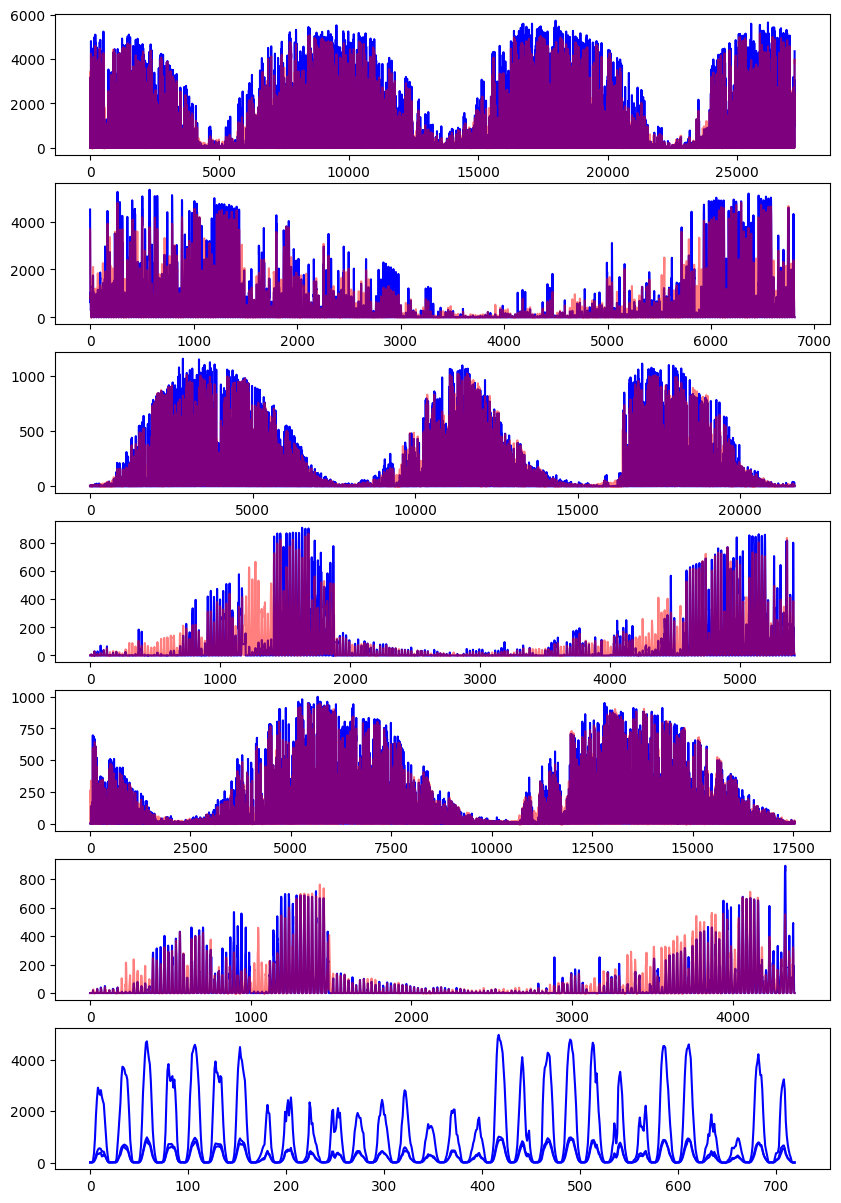

In [43]:
fig, axs = plt.subplots(7, figsize=(10, 15))

axs[0].plot(data.A.train_y, color="blue")
axs[0].plot(stacked_a.predict(data.A.train_x), color="red", alpha=0.5)

axs[1].plot(data.A.val_y, color="blue")
axs[1].plot(stacked_a.predict(data.A.val_x), color="red", alpha=0.5)


axs[2].plot(data.B.train_y, color="blue")
axs[2].plot(stacked_b.predict(data.B.train_x), color="red", alpha=0.5)

axs[3].plot(data.B.val_y, color="blue")
axs[3].plot(stacked_b.predict(data.B.val_x), color="red", alpha=0.5)

axs[4].plot(data.C.train_y, color="blue")
axs[4].plot(stacked_c.predict(data.C.train_x), color="red", alpha=0.5)

axs[5].plot(data.C.val_y, color="blue")
axs[5].plot(stacked_c.predict(data.C.val_x), color="red", alpha=0.5)


axs[6].plot(stacked_a.predict(data.A.test_x), color="blue")
axs[6].plot(stacked_b.predict(data.B.test_x), color="blue")
axs[6].plot(stacked_c.predict(data.C.test_x), color="blue")


mae_val_a = mean_absolute_error(data.A.val_y, stacked_a.predict(data.A.val_x))
mae_val_b = mean_absolute_error(data.B.val_y, stacked_b.predict(data.B.val_x))
mae_val_c = mean_absolute_error(data.C.val_y, stacked_c.predict(data.C.val_x))


print((mae_val_a + mae_val_b + mae_val_c) / 3) #178.17404523424878

In [44]:
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2155,2155,0
2156,2156,0
2157,2157,0
2158,2158,0


In [45]:
submit = np.concatenate((np.concatenate((stacked_a.predict(data.A.test_x), stacked_b.predict(data.B.test_x))),stacked_c.predict(data.C.test_x)))

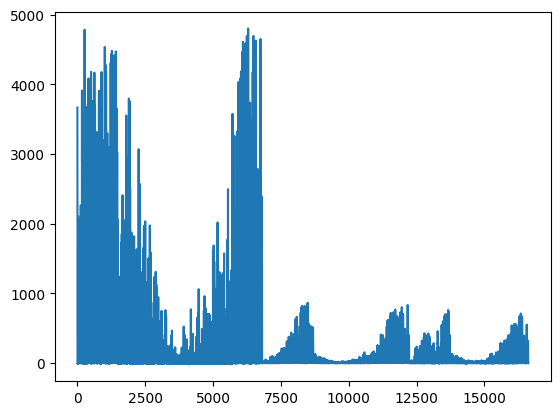

In [46]:
plt.plot(submit)

In [ ]:
test['prediction'] = submit
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv("submissions/avg_1.csv", index=False)